## Data Exploration

#### Lets import the necessary libs and load the dataet.

In [1]:
# import libraries

import pandas as pd # read the dataset
import numpy as np # linear algebra
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns  # visualize data
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# read data using pd.read_csv, then store the data in df dataframe
#Reading Data
df = pd.read_csv('yellow_tripdata7.csv')

In [3]:
#number of rows and columns 
df.shape

(2821515, 18)

In [4]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-07-01 00:08:51,2021-07-01 00:13:05,1.0,0.8,1.0,N,90,68,1.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
1,1.0,2021-07-01 00:22:39,2021-07-01 00:25:58,1.0,0.9,1.0,N,113,90,2.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
2,1.0,2021-07-01 00:48:33,2021-07-01 00:54:58,1.0,2.8,1.0,N,88,232,2.0,10.0,3.0,0.5,0.0,0.0,0.3,13.8,2.5
3,1.0,2021-07-01 00:59:44,2021-07-01 01:07:09,1.0,1.4,1.0,N,79,249,1.0,7.0,3.0,0.5,1.5,0.0,0.3,12.3,2.5
4,1.0,2021-07-01 00:08:35,2021-07-01 00:16:28,0.0,2.0,1.0,N,142,238,1.0,8.5,3.0,0.5,0.0,0.0,0.3,12.3,2.5


In [5]:
df.tail(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2821510,NaN,2021-07-09 18:07:09,2021-07-09 18:27:04,NaN,2.60,NaN,NaN,68,144,NaN,14.00,1.00,0.5,2.75,0.0,0.3,21.05,2.5
2821511,NaN,2021-07-09 18:16:00,2021-07-09 18:57:00,NaN,12.47,NaN,NaN,92,144,NaN,47.08,2.75,0.5,0.00,0.0,0.3,50.63,0.0
2821512,NaN,2021-07-09 18:07:46,2021-07-09 19:07:06,NaN,3.01,NaN,NaN,265,249,NaN,23.96,0.00,0.5,0.00,0.0,0.3,24.76,0.0
2821513,NaN,2021-07-09 18:17:00,2021-07-09 18:42:00,NaN,6.67,NaN,NaN,262,211,NaN,24.24,0.00,0.5,5.96,0.0,0.3,33.50,2.5
2821514,NaN,2021-07-09 18:11:00,2021-07-09 18:30:00,NaN,3.51,NaN,NaN,232,68,NaN,15.27,0.00,0.5,3.96,0.0,0.3,22.53,2.5


In [6]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
617902,2.0,2021-07-08 21:18:00,2021-07-08 21:38:24,2.0,4.54,1.0,N,264,13,1.0,16.5,0.50,0.5,3.50,0.00,0.3,23.80,2.5
2559760,2.0,2021-07-30 16:37:11,2021-07-30 16:37:25,1.0,0.00,1.0,N,193,193,1.0,2.5,1.00,0.5,0.00,0.00,0.3,4.30,0.0
804783,1.0,2021-07-10 23:27:21,2021-07-10 23:38:50,2.0,1.80,1.0,N,114,231,1.0,9.5,3.00,0.5,2.00,0.00,0.3,15.30,2.5
1339218,2.0,2021-07-16 21:13:56,2021-07-16 21:37:56,6.0,3.50,1.0,N,100,231,1.0,16.5,0.50,0.5,5.08,0.00,0.3,25.38,2.5
1873769,2.0,2021-07-22 21:18:18,2021-07-22 21:57:33,1.0,15.55,1.0,N,132,145,1.0,44.5,0.50,0.5,5.95,0.00,0.3,53.00,0.0
317047,1.0,2021-07-05 13:40:49,2021-07-05 13:49:57,1.0,1.60,1.0,N,236,142,1.0,9.0,2.50,0.5,2.00,0.00,0.3,14.30,2.5
1046962,2.0,2021-07-13 22:04:42,2021-07-13 22:21:01,1.0,11.62,1.0,N,264,218,2.0,32.0,0.50,0.5,0.00,0.00,0.3,33.30,0.0
1797920,2.0,2021-07-22 09:25:01,2021-07-22 09:36:31,3.0,1.44,1.0,N,141,263,2.0,9.0,0.00,0.5,0.00,0.00,0.3,12.30,2.5
2604304,2.0,2021-07-31 00:39:49,2021-07-31 00:57:11,2.0,4.89,1.0,N,230,261,1.0,16.5,0.50,0.5,4.06,0.00,0.3,24.36,2.5
2103768,1.0,2021-07-25 15:46:07,2021-07-25 16:16:50,1.0,10.70,1.0,N,138,249,1.0,32.5,3.75,0.5,6.00,6.55,0.3,49.60,2.5


In [7]:
#split the df data for train and test
df_train,df_test=train_test_split(df, test_size=.01, random_state=199)

In [8]:
#split the df_train data for train and valudation
df_train,df_val = train_test_split(df_train, test_size=.01, random_state=199)

In [9]:
#number of rows and columns 
df_train.shape

(2765366, 18)

In [10]:
#number of rows and columns 
df_test.shape

(28216, 18)

In [11]:
#number of rows and columns 
df_val.shape

(27933, 18)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765366 entries, 1893944 to 292431
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 400.9+ MB


## Data Pre-Processing for data train

In [13]:
#drop in useful column that contains data it will not be used in data analysis 
df_train=df_train.drop('store_and_fwd_flag', axis=1)

In [14]:
df_train.shape

(2765366, 17)

#### Check if there are NULL value 

In [15]:
df_train.isnull().sum()

VendorID                 128068
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          128068
trip_distance                 0
RatecodeID               128068
PULocationID                  0
DOLocationID                  0
payment_type             128068
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [16]:
# drop Null
df_train=df_train.dropna(how='any')

In [17]:
df_train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [18]:
#Check the outlier value
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
5.0          1
Name: payment_type, dtype: int64

In [19]:
#drop the 5
df_train=df_train.drop(df_train[df_train.payment_type.values==5].index)

In [20]:
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
Name: payment_type, dtype: int64

In [21]:
#Check the outlier value
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
0.0      65431
4.0      49640
6.0      43186
9.0          5
7.0          5
8.0          4
Name: passenger_count, dtype: int64

In [22]:
#drop the 0,9,7,8
df_train=df_train.drop(df_train[df_train.passenger_count.values==0].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==9].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==8].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==7].index)

In [23]:
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
4.0      49640
6.0      43186
Name: passenger_count, dtype: int64

In [24]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.total_amount.values<=0].index)

In [25]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.trip_distance.values<=0].index)

In [26]:
df_train.shape

(2530493, 17)

In [27]:
#df_train_sample=df_train.sample(100000,random_state=199 )

In [28]:
#df_train_sample.total_amount.describe()

In [29]:
df_train.passenger_count.unique

<bound method Series.unique of 1893944    1.0
474787     2.0
2462355    1.0
1503423    1.0
1452644    1.0
          ... 
722518     1.0
123269     1.0
1906657    1.0
969865     1.0
292431     2.0
Name: passenger_count, Length: 2530493, dtype: float64>

In [30]:
# change data type of feature (passenger_count) from float to integer
df_train['passenger_count'].astype(int)

1893944    1
474787     2
2462355    1
1503423    1
1452644    1
          ..
722518     1
123269     1
1906657    1
969865     1
292431     2
Name: passenger_count, Length: 2530493, dtype: int64

In [31]:
# creat a function to change a data type of (passenger_count) from intger to string to be a category.
def car_type(passenger_count):
    if passenger_count >= 4:
        return 'family'
    else:
        return 'basic'
### 6



In [32]:
# apply the function in all observitons 
df_train['car_type']= df_train.passenger_count.apply(car_type)
df_train.car_type


1893944    basic
474787     basic
2462355    basic
1503423    basic
1452644    basic
           ...  
722518     basic
123269     basic
1906657    basic
969865     basic
292431     basic
Name: car_type, Length: 2530493, dtype: object

In [33]:
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,car_type
1893944,2.0,2021-07-23 08:55:24,2021-07-23 09:00:49,1.0,1.17,1.0,236,237,1.0,6.0,0.0,0.5,1.50,0.00,0.3,10.80,2.5,basic
474787,2.0,2021-07-07 12:47:35,2021-07-07 12:55:32,2.0,1.72,1.0,170,141,1.0,8.0,0.0,0.5,2.26,0.00,0.3,13.56,2.5,basic
2462355,2.0,2021-07-29 15:49:00,2021-07-29 16:01:10,1.0,1.90,1.0,142,141,1.0,10.0,0.0,0.5,3.32,0.00,0.3,16.62,2.5,basic
1503423,2.0,2021-07-18 19:19:25,2021-07-18 19:26:39,1.0,0.89,1.0,229,43,2.0,6.5,0.0,0.5,0.00,0.00,0.3,9.80,2.5,basic
1452644,2.0,2021-07-18 04:18:14,2021-07-18 04:53:22,1.0,8.32,1.0,186,75,2.0,30.0,0.5,0.5,0.00,0.00,0.3,33.80,2.5,basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722518,2.0,2021-07-10 01:11:20,2021-07-10 01:33:28,1.0,9.34,1.0,138,151,1.0,28.0,0.5,0.5,7.17,6.55,0.3,44.27,0.0,basic
123269,2.0,2021-07-02 14:33:24,2021-07-02 14:58:39,1.0,3.30,1.0,141,50,1.0,17.5,0.0,0.5,4.16,0.00,0.3,24.96,2.5,basic
1906657,2.0,2021-07-23 11:40:56,2021-07-23 11:45:12,1.0,0.80,1.0,162,237,1.0,5.5,0.0,0.5,2.64,0.00,0.3,11.44,2.5,basic
969865,2.0,2021-07-13 08:22:38,2021-07-13 08:29:47,1.0,1.07,1.0,238,166,1.0,7.0,0.0,0.5,0.70,0.00,0.3,11.00,2.5,basic


In [34]:
#  df_train.get_dummies(passenger_count) to change from category to dummy
df_train = pd.get_dummies(df_train, columns=['car_type'],drop_first=True)

In [35]:
df_train.sample(44)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,car_type_family
338166,2.0,2021-07-05 17:38:37,2021-07-05 17:54:27,1.0,5.01,1.0,236,79,2.0,17.5,0.0,0.5,0.00,0.00,0.3,20.80,2.5,0
2338809,2.0,2021-07-28 10:01:07,2021-07-28 10:14:35,1.0,1.78,1.0,249,148,1.0,10.5,0.0,0.5,2.76,0.00,0.3,16.56,2.5,0
2177670,2.0,2021-07-26 14:25:20,2021-07-26 15:03:39,1.0,15.12,1.0,132,89,2.0,46.0,0.0,0.5,0.00,0.00,0.3,48.05,0.0,0
2342466,2.0,2021-07-28 11:52:17,2021-07-28 11:58:27,1.0,1.05,1.0,238,143,1.0,6.0,0.0,0.5,1.86,0.00,0.3,11.16,2.5,0
831387,2.0,2021-07-11 12:51:39,2021-07-11 13:01:27,1.0,1.23,1.0,144,148,1.0,8.0,0.0,0.5,1.50,0.00,0.3,12.80,2.5,0
1396100,2.0,2021-07-17 14:48:55,2021-07-17 14:51:27,1.0,0.49,1.0,263,141,1.0,4.0,0.0,0.5,1.46,0.00,0.3,8.76,2.5,0
2022947,1.0,2021-07-24 15:37:38,2021-07-24 15:44:21,1.0,0.90,1.0,48,48,1.0,6.0,2.5,0.5,1.00,0.00,0.3,10.30,2.5,0
2098323,2.0,2021-07-25 14:04:47,2021-07-25 14:09:23,1.0,0.98,1.0,43,43,1.0,5.5,0.0,0.5,1.00,0.00,0.3,9.80,2.5,0
890070,2.0,2021-07-12 09:09:50,2021-07-12 09:37:13,5.0,13.54,1.0,138,254,2.0,38.5,0.0,0.5,0.00,6.55,0.3,47.10,0.0,1
732235,1.0,2021-07-10 09:13:04,2021-07-10 09:37:20,1.0,8.20,1.0,33,14,1.0,25.0,0.0,0.5,7.70,0.00,0.3,33.50,0.0,0


In [36]:
# explore the day of each trip
df_train['tpep_pickup_datetime']=pd.to_datetime(df_train['tpep_pickup_datetime'])
df_train['tpep_dropoff_datetime']=pd.to_datetime(df_train['tpep_dropoff_datetime'])
df_train['pickup_day_no']=df_train['tpep_pickup_datetime'].dt.weekday
df_train['dropoff_day_no']=df_train['tpep_dropoff_datetime'].dt.weekday

In [37]:
df_train['pickup_day_no'].astype(int)

1893944    4
474787     2
2462355    3
1503423    6
1452644    6
          ..
722518     5
123269     4
1906657    4
969865     1
292431     6
Name: pickup_day_no, Length: 2530493, dtype: int64

In [38]:
df_train.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,car_type_family,pickup_day_no,dropoff_day_no
1893944,2.0,2021-07-23 08:55:24,2021-07-23 09:00:49,1.0,1.17,1.0,236,237,1.0,6.0,0.0,0.5,1.50,0.0,0.3,10.80,2.5,0,4,4
474787,2.0,2021-07-07 12:47:35,2021-07-07 12:55:32,2.0,1.72,1.0,170,141,1.0,8.0,0.0,0.5,2.26,0.0,0.3,13.56,2.5,0,2,2
2462355,2.0,2021-07-29 15:49:00,2021-07-29 16:01:10,1.0,1.90,1.0,142,141,1.0,10.0,0.0,0.5,3.32,0.0,0.3,16.62,2.5,0,3,3
1503423,2.0,2021-07-18 19:19:25,2021-07-18 19:26:39,1.0,0.89,1.0,229,43,2.0,6.5,0.0,0.5,0.00,0.0,0.3,9.80,2.5,0,6,6
1452644,2.0,2021-07-18 04:18:14,2021-07-18 04:53:22,1.0,8.32,1.0,186,75,2.0,30.0,0.5,0.5,0.00,0.0,0.3,33.80,2.5,0,6,6
796634,1.0,2021-07-10 21:19:13,2021-07-10 21:41:26,1.0,3.50,1.0,211,229,2.0,16.0,3.0,0.5,0.00,0.0,0.3,19.80,2.5,0,5,5
705892,2.0,2021-07-09 21:21:09,2021-07-09 21:35:43,1.0,6.50,1.0,87,142,1.0,20.0,0.5,0.5,4.76,0.0,0.3,28.56,2.5,0,4,4
341074,2.0,2021-07-05 18:25:07,2021-07-05 18:45:04,1.0,3.78,1.0,100,4,1.0,15.5,0.0,0.5,3.76,0.0,0.3,22.56,2.5,0,0,0
1021252,2.0,2021-07-13 17:39:48,2021-07-13 17:52:45,1.0,3.90,1.0,231,50,1.0,14.0,1.0,0.5,3.66,0.0,0.3,21.96,2.5,0,1,1
2557521,1.0,2021-07-30 16:10:02,2021-07-30 16:17:47,1.0,1.50,1.0,161,236,2.0,7.5,3.5,0.5,0.00,0.0,0.3,11.80,2.5,0,4,4


In [39]:
#overwrite to creat a sample.
df_train_sample=df_train.sample(100000,random_state=199 )

In [40]:
df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2431579 to 1577401
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  float64       
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  float64       
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  float64       
 6   PULocationID           100000 non-null  int64         
 7   DOLocationID           100000 non-null  int64         
 8   payment_type           100000 non-null  float64       
 9   fare_amount            100000 non-null  float64       
 10  extra                  100000 non-null  float64       
 11  mta_tax                100000 non-null  float64       
 12  tip_amount             100000 non-nul

## Data Visualization for data train sample

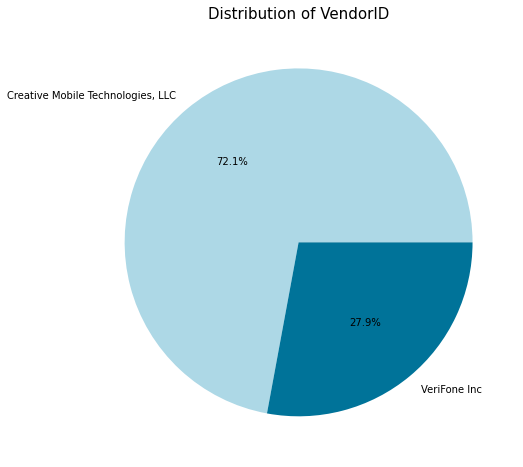

In [41]:
# visual a providers of taxi service by using a pie figure.
labels = ['Creative Mobile Technologies, LLC','VeriFone Inc']
sizes = df_train_sample['VendorID'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors = ['#ADD8E6','#007399'])
plt.title("Distribution of VendorID",color = 'black',fontsize = 15);

                         The providers for taxi service

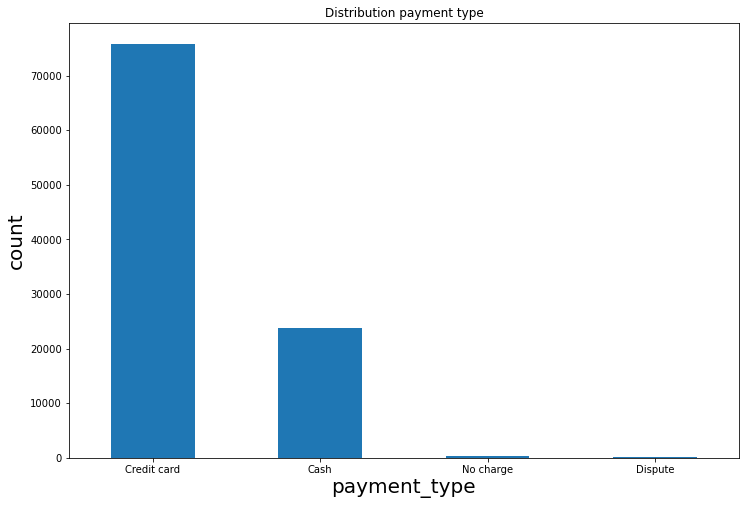

In [42]:
# to catch a distriution of payment type by using bar plot. 
labels=['Credit card','Cash','No charge','Dispute']
plt.figure(figsize=(12,8))
fig=df_train_sample['payment_type'].value_counts().plot(kind='bar', title= 'Distribution payment type' ,  rot=0)
plt.xlabel('payment_type',fontsize = 20);
plt.ylabel('count',fontsize = 20);
fig.set_xticklabels(labels);

### In this figure show a payment types

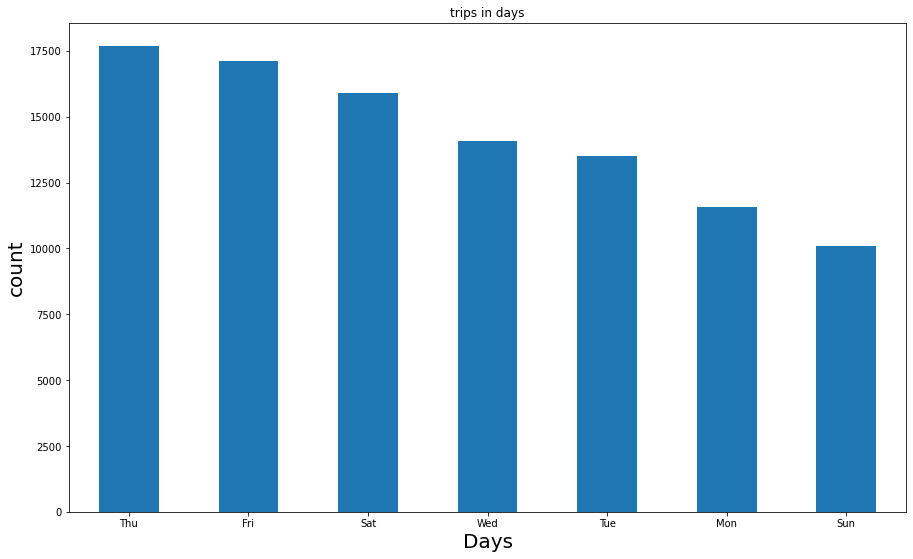

In [43]:
# comparison between a days. 
labels=['Thu','Fri','Sat','Wed','Tue','Mon','Sun']
fig=df_train_sample['pickup_day_no'].value_counts().plot(kind='bar', title= 'trips in days' , figsize=(15,9), rot=0)
plt.xlabel('Days',fontsize = 20);
plt.ylabel('count',fontsize = 20);
fig.set_xticklabels(labels);

### graph shows how many trips in each day.

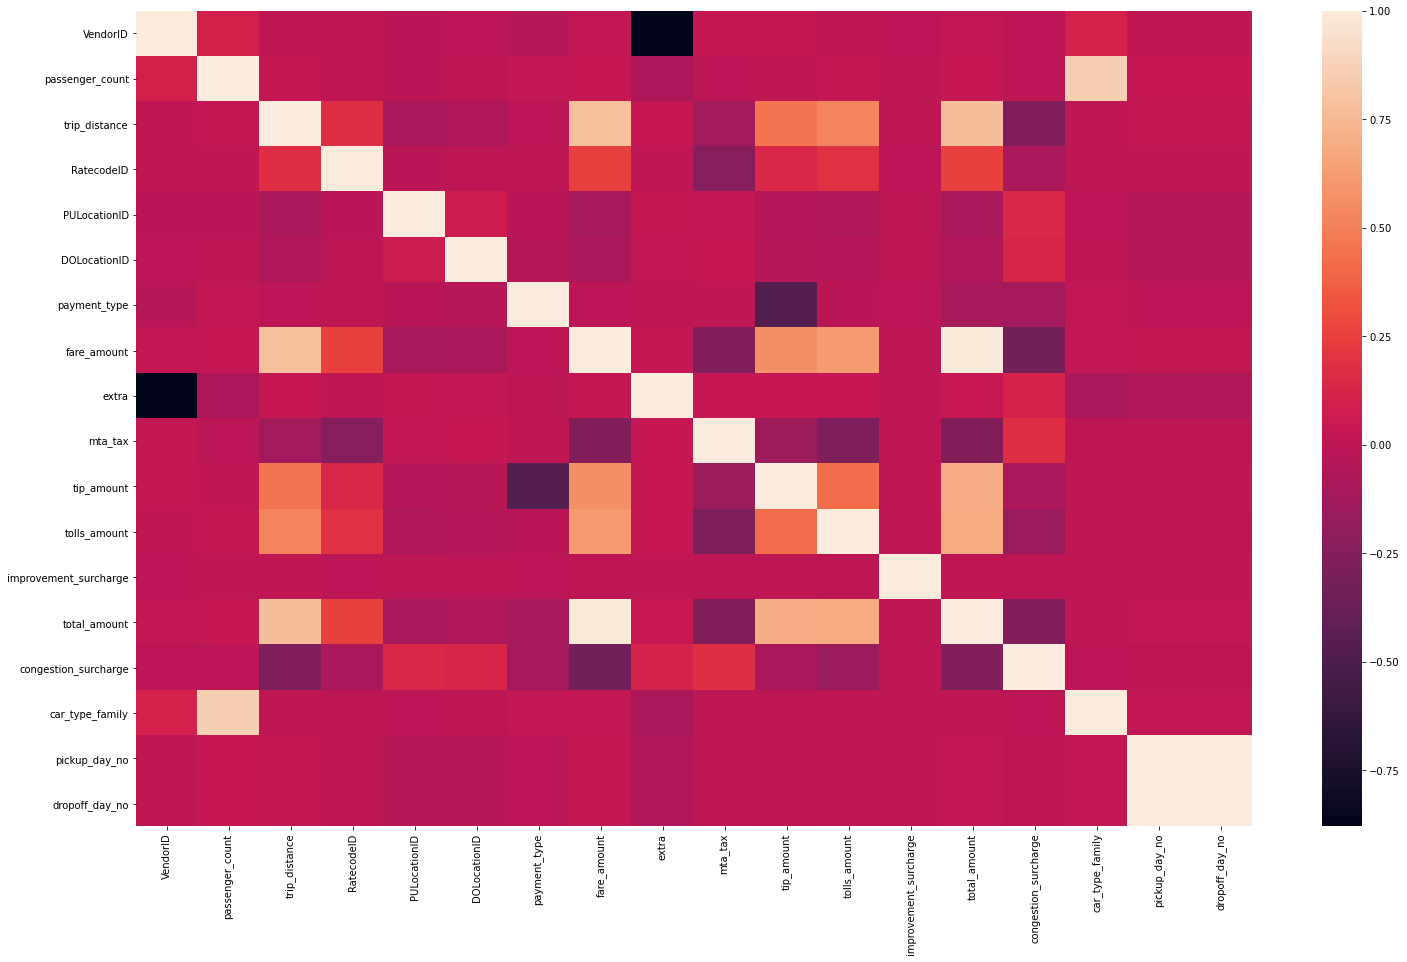

In [44]:
# show a correlations between Xs and target.
plt.figure(figsize=(25, 15))
sns.heatmap(df_train_sample.corr());

In [45]:
df_train_sample1=df_train_sample.loc[:,['trip_distance', 'RatecodeID', 'payment_type', 
                      'fare_amount', 'extra', 'mta_tax',  
                      'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                      'congestion_surcharge','total_amount']]

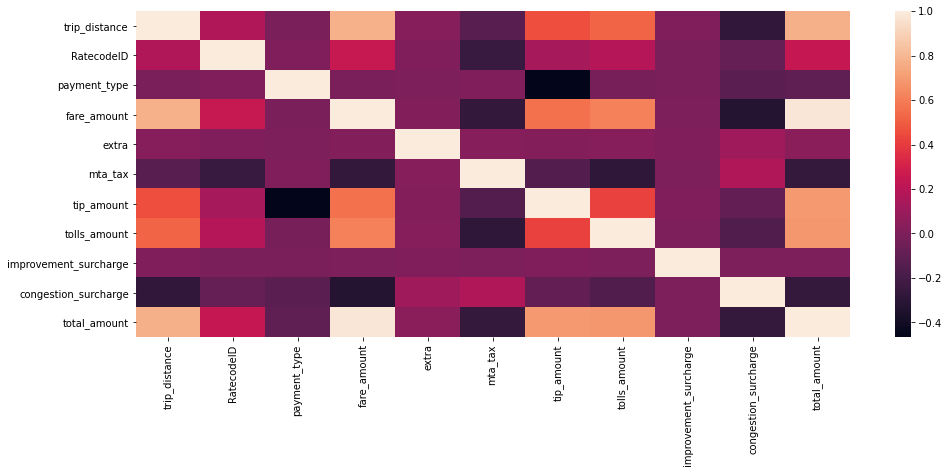

In [46]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_train_sample1.corr());

### Correlation is a statistical measure that expresses
#### the extent to which two variables are linearly related (meaning they change together at a constant rate). 
#### In this heatmap noticed  a correlation between (trip_distance,total_amount), (RatecodeID,total_amount),
#### (fare_amount,total_amount), (tip_amount,total_amount), and (tolls_amount,Total_amount)

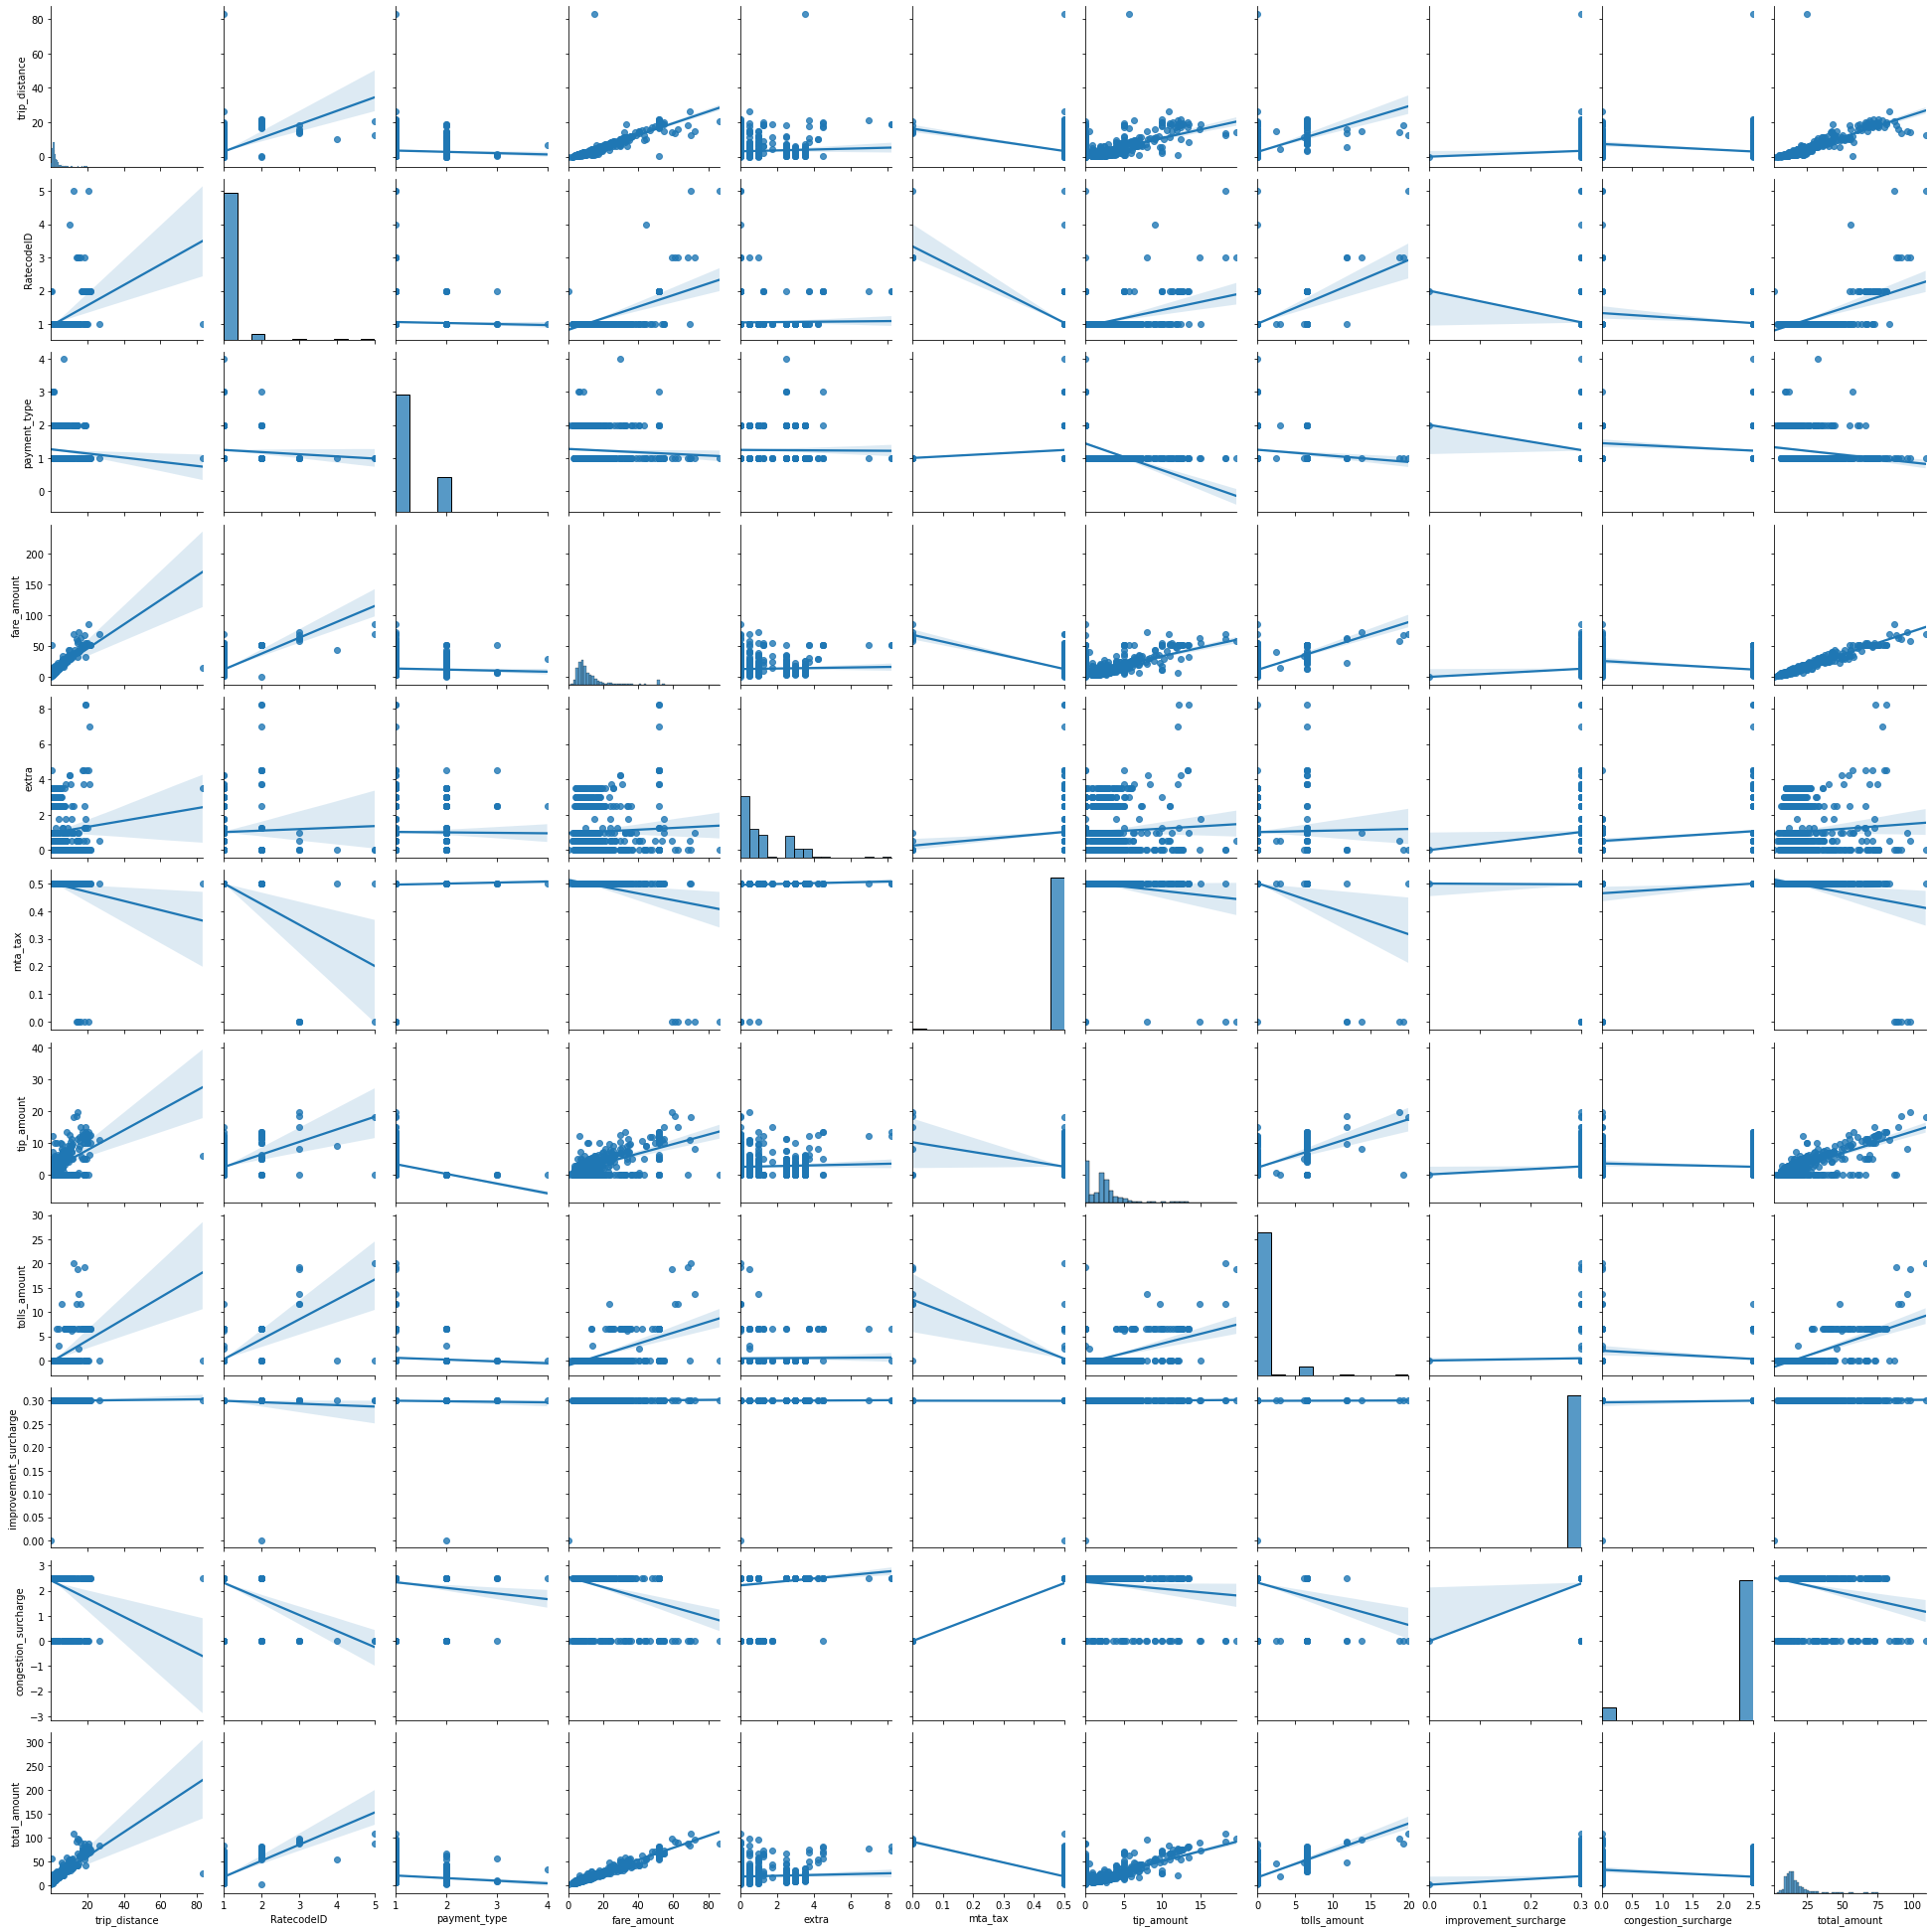

In [47]:

g = sns.pairplot(df_train_sample1[:1000], kind='reg')

#g = sns.pairplot(df_train_sample)

### Plot pairwise relationships 
#### By default, this function will create a grid of Axes such that each numeric variable in data
#### will be shared across the y-axes across a single row and the x-axes across a single column.
#### The diagonal plots are treated differently: a univariate distribution plot 
#### is drawn to show the marginal distribution of the data in each column.

## Data Pre-Processing for data validation 

In [48]:
#number of rows and columns 
df_val.shape

(27933, 18)

In [49]:
#drop in useful column that contains data it will not be used in data analysis 
df_val=df_val.drop('store_and_fwd_flag', axis=1)

In [50]:
#number of rows and columns 

df_val.shape

(27933, 17)

### Check if there are NULL value 


In [51]:
df_val.isnull().sum()

VendorID                 1284
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1284
trip_distance               0
RatecodeID               1284
PULocationID                0
DOLocationID                0
payment_type             1284
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [52]:
#drop the null
df_val=df_val.dropna(how='any')

In [155]:
df_val.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
car_type_family          0
pickup_day_no            0
dropoff_day_no           0
dtype: int64

In [54]:
#Check the count value
df_val['passenger_count'].value_counts()

1.0    18972
2.0     4134
3.0     1202
5.0      712
0.0      691
4.0      479
6.0      457
7.0        1
9.0        1
Name: passenger_count, dtype: int64

In [55]:
#drop the 0,9,7,8
df_val=df_val.drop(df_val[df_val.passenger_count.values==0].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==9].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==8].index)
df_val=df_val.drop(df_val[df_val.passenger_count.values==7].index)

In [56]:
df_val['passenger_count'].value_counts()

1.0    18972
2.0     4134
3.0     1202
5.0      712
4.0      479
6.0      457
Name: passenger_count, dtype: int64

In [57]:
df_val['car_type']= df_val.passenger_count.apply(car_type)

df_val = pd.get_dummies(df_val, columns=['car_type'],drop_first=True)

#
df_val.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,car_type_family
2678986,2.0,2021-07-31 21:26:48,2021-07-31 21:31:30,2.0,0.85,1.0,141,262,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0
1000340,2.0,2021-07-13 14:46:25,2021-07-13 14:50:20,5.0,0.51,1.0,264,264,2.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5,1
1072388,2.0,2021-07-14 10:52:08,2021-07-14 11:00:06,1.0,0.76,1.0,162,163,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,0


In [58]:
df_val['tpep_pickup_datetime']=pd.to_datetime(df_val['tpep_pickup_datetime'])
df_val['tpep_dropoff_datetime']=pd.to_datetime(df_val['tpep_dropoff_datetime'])
df_val['pickup_day_no']=df_val['tpep_pickup_datetime'].dt.weekday
df_val['dropoff_day_no']=df_val['tpep_dropoff_datetime'].dt.weekday

In [59]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.total_amount.values<=0].index)

In [60]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.trip_distance.values<=0].index)

In [61]:
df_val['pickup_day_no'].astype(int)

2678986    5
1000340    1
1072388    2
1151453    2
2288237    1
          ..
1499387    6
416852     1
381131     1
1438933    5
1996447    5
Name: pickup_day_no, Length: 25546, dtype: int64

In [62]:
df_val.shape

(25546, 20)

## Model 

In [137]:
# select a Xs which have correlation with target in train.
X_train = df_train.loc[:,['trip_distance', 'RatecodeID',
                       'extra', 'pickup_day_no',
                       'tolls_amount', 
                        'car_type_family']]

y_train = df_train['total_amount']

In [138]:
# select a Xs which have correlation with target in valdation.
X_val = df_val.loc[:,['trip_distance', 'RatecodeID', 
                       'extra', 'pickup_day_no',
                       'tolls_amount',  
                       'car_type_family']]

y_val = df_val['total_amount']

In [139]:
# build a moudel.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

In [140]:
# linear regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
lm.score(X_train_scaled, y_train)

0.7714287888085907

In [141]:
lm.score(X_val_scaled, y_val)

0.7466300098708141

In [142]:
#The rmse and mae for the data train in linear model.
preds_train = lm.predict(X_train_scaled)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

7.057038358293099
3.117698110297238


In [143]:
#The rmse and mae for the data valdition in linear model.
preds_val = lm.predict(X_val_scaled)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

7.25102763463242
3.1005720226441014


In [144]:
# Polynomial regression model
poly = PolynomialFeatures(degree=2) 

In [145]:
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

In [146]:
lm_poly = LinearRegression()

In [147]:
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression train R^2: 0.871
Degree 2 polynomial regression val R^2: 0.889


In [148]:
#The rmse and mae for the data train in ploynomial.
preds_train = lm_poly.predict(X_train_poly)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

5.294967280004885
2.660820300604694


In [149]:
#The rmse and mae for valdtion data in ploynomial.
preds_val = lm_poly.predict(X_val_poly)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

4.800398615835284
2.6221954800942724


In [150]:
# extract the alpha 
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    val_set_pred = pipe.predict(X_val)
    err_vec_val[i] = mean_absolute_error(y_val, val_set_pred)
    
    

In [151]:
alphalist[np.argmin(err_vec_val)]

0.01

In [152]:
#ridge model for train data 
lm_model_ridge = Ridge(alpha =0.01)
lm_model_ridge.fit(X_train_scaled, y_train)
lm_model_ridge.score(X_train_scaled, y_train)

0.7714287888085909

In [79]:
#ridge model for validtion data 
lm_model_ridge = Ridge(alpha = 0.01)
lm_model_ridge.fit(X_train_scaled, y_train)
lm_model_ridge.score(X_val_scaled, y_val)

0.746663134708925

In [80]:
#The rmse and mae for the data train in ridge
preds_train = lm_model_ridge.predict(X_train_scaled)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

7.057022818255515
3.117648515607842


In [81]:
#The rmse and mae for the data valdition in ridge
preds_val = lm_model_ridge.predict(X_val_scaled)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

7.250553630257774
3.100547813800587


In [82]:
#lasso model for train data 
lm_model_lasso = Lasso(alpha = 0.01)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_train, y_train)

0.771419948185945

In [83]:
#lasso model for valdtion data 
lm_model_lasso = Lasso(alpha = 0.01)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_val, y_val)

0.7464407248047246

In [84]:
#The rmse and mae for the data train in lasso
preds_train = lm_model_lasso.predict(X_train)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

7.057174832194484
3.11778853908283


In [85]:
#The rmse and mae for the data validition in lasso 
preds_val = lm_model_lasso.predict(X_val)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

7.2537356408166245
3.1007181536153934


In [86]:
#ElasticNet model for train data 
ent=ElasticNet(alpha = 0.01)
ent.fit(X_train, y_train)
ent.score(X_train, y_train)

0.7714227190419838

In [87]:
#ElasticNet model for valdtion data 
ent=ElasticNet(alpha = 0.01)
ent.fit(X_train, y_train)
ent.score(X_val, y_val)

0.7463277563984392

In [88]:
#The rmse and mae for the data train in ElasticNet 
preds_train = ent.predict(X_train)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print(rmse)
print(mae)

7.057132058394657
3.117704897410268


In [89]:
#The rmse and mae for the data validition in ElasticNet 
preds_val = ent.predict(X_val)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

7.255351341332675
3.1006614015136984


In [90]:
# creat a sample for Knn model.
df_train_sample=df_train.sample(100000,random_state=199 )

In [91]:
X_train = df_train_sample.loc[:,['trip_distance', 'RatecodeID',
                       'extra', 'pickup_day_no',
                       'tolls_amount', 'improvement_surcharge', 
                        'car_type_family']]

y_train = df_train_sample['total_amount']

In [92]:
"""

"""
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 10}

In [93]:
#knn model for train data 
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_model.score(X_train, y_train)

0.9141381343255142

In [94]:
#knn model for valdtion data
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_model.score(X_val, y_val)

0.9190088960385532

In [96]:
#The rmse and mae for the data train in Knn
preds_val = knn_model.predict(X_train)
rmse = mean_squared_error(y_train, preds_val, squared=False)
mae = mean_absolute_error(y_train, preds_val)
print(rmse)
print(mae)

4.316656298804666
2.05254087


In [97]:
#The rmse and mae for the data valdition in Knn
preds_val = knn_model.predict(X_val)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print(rmse)
print(mae)

4.099591956779113
2.201068425585219


## Data Pre-Processing for data test 

In [98]:
df_test.shape

(28216, 18)

In [99]:
df_test.isnull().sum()

VendorID                 1304
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1304
trip_distance               0
RatecodeID               1304
store_and_fwd_flag       1304
PULocationID                0
DOLocationID                0
payment_type             1304
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [100]:
df_test=df_test.dropna(how='any')

In [101]:
df_test.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [102]:
df_test['passenger_count'].value_counts()

1.0    19259
2.0     4151
3.0     1182
5.0      738
0.0      627
4.0      526
6.0      429
Name: passenger_count, dtype: int64

In [103]:
#drop the 0,9,7,8
df_test=df_test.drop(df_test[df_test.passenger_count.values==0].index)

In [104]:
df_test['passenger_count'].value_counts()

1.0    19259
2.0     4151
3.0     1182
5.0      738
4.0      526
6.0      429
Name: passenger_count, dtype: int64

In [105]:
df_test['car_type']= df_test.passenger_count.apply(car_type)

df_test = pd.get_dummies(df_test, columns=['car_type'],drop_first=True)

#
df_test.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,car_type_family
269270,1.0,2021-07-04 15:30:18,2021-07-04 15:38:45,2.0,1.7,1.0,N,113,125,1.0,8.5,2.5,0.5,2.35,0.0,0.3,14.15,2.5,0
1834566,2.0,2021-07-22 15:25:18,2021-07-22 15:30:43,1.0,0.6,1.0,N,162,237,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5,0
601438,1.0,2021-07-08 17:41:34,2021-07-08 18:00:30,1.0,3.2,1.0,N,162,151,2.0,15.0,3.5,0.5,0.00,0.0,0.3,19.30,2.5,0


In [106]:
df_test['tpep_pickup_datetime']=pd.to_datetime(df_test['tpep_pickup_datetime'])
df_test['tpep_dropoff_datetime']=pd.to_datetime(df_test['tpep_dropoff_datetime'])
df_test['pickup_day_no']=df_test['tpep_pickup_datetime'].dt.weekday
df_test['dropoff_day_no']=df_test['tpep_dropoff_datetime'].dt.weekday

In [107]:
df_test['pickup_day_no'].astype(int)

269270     6
1834566    3
601438     3
529459     2
494097     2
          ..
1665373    1
1160944    3
2467281    3
720541     5
1952691    4
Name: pickup_day_no, Length: 26285, dtype: int64

In [108]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.total_amount.values<=0].index)

In [109]:
#drop the negative value 
df_val=df_val.drop(df_val[df_val.trip_distance.values<=0].index)

In [110]:
df_test.shape

(26285, 21)

## Model 

In [111]:
X_test = df_test.loc[:,['trip_distance', 'RatecodeID', 
                       'extra', 'pickup_day_no',
                       'tolls_amount', 'improvement_surcharge', 
                       'car_type_family']]

y_test = df_test['total_amount']

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [113]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
lm.score(X_test_scaled, y_test)

0.7794116624926734

In [114]:
#The rmse and mae for the data test in linear model.
preds_test = lm.predict(X_test_scaled)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print(rmse)
print(mae)

7.000529914683116
3.991095920066853


In [115]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression test R^2: 0.845


In [116]:
#The rmse and mae for the data test in ploynomial.
preds_test = lm_poly.predict(X_test_poly)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print(rmse)
print(mae)

5.872472277265237
2.9716705693702545


In [117]:
lm_model_ridge = Ridge(alpha = 0.01)
lm_model_ridge.fit(X_train_scaled, y_train)
lm_model_ridge.score(X_test_scaled, y_test)

0.7794116480303919

In [118]:
#The rmse and mae for the data test in ridge.
preds_test = lm_model_ridge.predict(X_test_scaled)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print(rmse)
print(mae)

7.000529914683116
3.991095920066853


In [119]:
#lasso model for valdtion data 
lm_model_lasso = Lasso(alpha = 0.01)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_test, y_test)

0.7764701704752998

In [125]:
#The rmse and mae for the data test in lasso.
preds_test = lm_model_lasso.predict(X_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print(rmse)
print(mae)

7.047050527853428
4.002483082099062


In [121]:
#ElasticNet model for train data 
ent=ElasticNet(alpha = 0.01)
ent.fit(X_train, y_train)
ent.score(X_test, y_test)

0.7765035968651385

In [128]:
#The rmse and mae for the data test in ElasticNet.
preds_test = ent.predict(X_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print(rmse)
print(mae)

7.0465236042979384
4.001832361308318


In [154]:
X_train = df_train_sample.loc[:,['trip_distance', 'RatecodeID',
                       'extra', 'pickup_day_no',
                       'tolls_amount', 'improvement_surcharge', 
                        'car_type_family']]

y_train = df_train_sample['total_amount']

In [130]:
#knn model for test data 
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.865859268076722

In [153]:
#The rmse and mae for the data test in knn model.
preds_test = knn_model.predict(X_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print(rmse)
print(mae)

5.459086525211613
2.4862028152938938
